<a href="https://colab.research.google.com/github/saurabhv158/AAPL-PREDICTION/blob/main/IndiGo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To analyze the structure and content of the dataset and remove any irrelevant information, we can start by examining the columns and a few sample rows of the dataset. This will help us understand what data is present and decide what might be irrelevant.
Here’s how we can do it:

1.   Load the dataset.
2.   Inspect the columns and data.
3.   Determine and remove irrelevant columns.

Let's go through these steps in code:

**Step 1: Load the Dataset**

In [41]:
import pandas as pd

df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)

# Display the first few rows of the dataframe
print(df.head())

                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  


**Step 2: Inspect the Columns and Data**

After loading the dataset, inspect its structure:



**Step 3: Determine and Remove Irrelevant Columns**

Once we know the structure and content, we can decide which columns are irrelevant. Let's assume columns like id, url, etc., might be irrelevant. We can drop them as follows:

In [42]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataframe
print("\nColumns in the dataset:")
print(df.columns)

# Display basic information about the dataframe
print("\nBasic information about the dataset:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Display a few sample rows
print("\nSample rows from the dataset:")
print(df.sample(5))

# List of columns to drop (this list is hypothetical and should be adjusted based on actual data inspection)
columns_to_drop = ['id', 'url', 'created_at', 'updated_at']

# Drop irrelevant columns
df_cleaned1 = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned1.head())

First few rows of the dataset:
                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  

Columns in the dataset:
Index(['question', 'answer'], dtype='object')

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ques

In [43]:
print(df_cleaned1.head())
df_cleaned=df_cleaned1[:50]
print(df_cleaned.head())
df_cleaned.describe()

                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  
                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ... 

,question,answer
count,50,50
unique,49,50
top,"What is a proxy, and how can I use one?",Isn’t it awful? You would swear that there was...
freq,2,1


To preprocess the text data in the dataset, we'll apply the following NLP techniques:

Tokenization: Breaking the text into individual words or tokens.
Stop Word Removal: Removing common words that do not carry significant meaning (e.g., "and", "the").
Stemming/Lemmatization: Reducing words to their base or root form.
We'll use the nltk library for these tasks. If you don't have it installed, you can install it using pip install nltk.

Here's how you can apply these techniques:

In [44]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Stop word removal
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming (use lemmatizer instead of stemming if preferred)
    # stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return lemmatized_tokens

# Apply preprocessing to each question
df_cleaned['processed_questions'] = df_cleaned['question'].apply(preprocess_text)
df_cleaned['processed_answers'] = df_cleaned['answer'].apply(preprocess_text)

# Display the processed DataFrame
print(df_cleaned.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-44-90ea3c9d79b8>:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  \
0  Isn’t it awful? You would swear that there was...   
1  A proxy server is a system or router that prov...   
2                                 MacArthur's Park\n   
3  Don't let apps that are liers put adds on your...   
4  St. John in the book of Revelation mentions an...   

                                 processed_questions  \
0  [whenever, get, shower, girlfriend, want, join...   
1                            [proxy, ,, use, one, ?]   
2  [song, lyric, ``, someone, left, cake, rain, '...   
3  [owner, adult, website, called, http, :, //mat...   
4  [Bible, mention, anything, place, ``, '', h

<ipython-input-44-90ea3c9d79b8>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
from transformers import AutoTokenizer

# Define the model names
model_names = ["bert-base-uncased", "t5-base", "gpt2"]

# Load the tokenizers
tokenizers = {name: AutoTokenizer.from_pretrained(name) for name in model_names}

# Tokenize the questions
df_cleaned['tokenized_questions'] = df_cleaned['question'].apply(lambda x: {name: tokenizers[name](x, return_tensors='pt') for name in model_names})

# Tokenize the questions
df_cleaned['tokenized_answers'] = df_cleaned['answer'].apply(lambda x: {name: tokenizers[name](x, return_tensors='pt') for name in model_names})

print(df_cleaned['tokenized_questions'].head())
print(df_cleaned['tokenized_answers'].head())


<ipython-input-45-13b8fec8f891>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Token indices sequence length is longer than the specified maximum sequence length for this model (920 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1073 > 1024). Running this sequence through the model will result in indexing errors


0    {'bert-base-uncased': ['input_ids', 'token_typ...
1    {'bert-base-uncased': ['input_ids', 'token_typ...
2    {'bert-base-uncased': ['input_ids', 'token_typ...
3    {'bert-base-uncased': ['input_ids', 'token_typ...
4    {'bert-base-uncased': ['input_ids', 'token_typ...
Name: tokenized_questions, dtype: object
0    {'bert-base-uncased': ['input_ids', 'token_typ...
1    {'bert-base-uncased': ['input_ids', 'token_typ...
2    {'bert-base-uncased': ['input_ids', 'token_typ...
3    {'bert-base-uncased': ['input_ids', 'token_typ...
4    {'bert-base-uncased': ['input_ids', 'token_typ...
Name: tokenized_answers, dtype: object


<ipython-input-45-13b8fec8f891>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Explanation:**
1. Tokenization: We use nltk.word_tokenize to split the text into tokens (words).
2. Stop Word Removal: We filter out common stop words using the NLTK stop words ist.
3. Stemming/Lemmatization: We demonstrate both stemming and lemmatization. You can choose to use either one. Here, we use lemmatization (WordNetLemmatizer) for demonstration.

Testing various NLP models such as BERT, T5, and GPT on the Quora Question Answer Dataset involves several steps. We will use the transformers library from Hugging Face, which provides easy access to these models. If you haven't installed it yet, you can do so with pip install transformers.

Below are the steps to load and test these models:

1. Load the dataset: Load the Quora Question Answer Dataset.
2. Preprocess the data: Tokenize the questions.
3. Load and test the models: Load BERT, T5, and GPT models and perform inference.

**Step 1: Load the Dataset**

Assuming you have already loaded and cleaned the dataset as shown previously:

**Step 2: Preprocess the Data**

We will use the transformers library's tokenizer for preprocessing:

**Step 3: Load and Test the Models**

We will load the models and perform inference:

In [46]:
from transformers import AutoModelForSequenceClassification, AutoModelForSeq2SeqLM, AutoModelForCausalLM

# Load the models
bert_model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")
t5_model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")

# Define a function to get model outputs
def get_model_outputs(tokenized_input, model, tokenizer, model_type):
    if model_type == "bert":
        outputs = model(**tokenized_input).logits.argmax(dim=-1)
    elif model_type == "t5":
        input_ids = tokenized_input['input_ids']
        outputs = model.generate(input_ids)
    elif model_type == "gpt":
        input_ids = tokenized_input['input_ids']
        outputs = model.generate(input_ids, max_length=60)

    decoded_outputs = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return decoded_outputs

# Apply the models to the tokenized questions
df_cleaned['bert_outputs'] = df_cleaned['tokenized_questions'].apply(lambda x: get_model_outputs(x["bert-base-uncased"], bert_model, tokenizers["bert-base-uncased"], "bert"))
df_cleaned['t5_outputs'] = df_cleaned['tokenized_questions'].apply(lambda x: get_model_outputs(x["t5-base"], t5_model, tokenizers["t5-base"], "t5"))
df_cleaned['gpt_outputs'] = df_cleaned['tokenized_questions'].apply(lambda x: get_model_outputs(x["gpt2"], gpt_model, tokenizers["gpt2"], "gpt"))

print(df_cleaned[['question', 'bert_outputs', 't5_outputs', 'gpt_outputs']])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-46-0a3e3cd939be>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning:

Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.

<ipython-input-46-0a3e3cd939be>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice fro

                                             question bert_outputs  \
0   Why whenever I get in the shower my girlfriend...  [[unused0]]   
1             What is a proxy, and how can I use one?  [[unused0]]   
2   What song has the lyrics "someone left the cak...  [[unused0]]   
3   I am the owner of an adult website called http...  [[unused0]]   
4   Does the Bible mention anything about a place ...  [[unused0]]   
5   What are useful free and open-source tools for...  [[unused0]]   
6   The justice department has told the state of M...  [[unused0]]   
7   Why are the Kardashians so popular? Why are pe...  [[unused0]]   
8   How fast could the US Air Force SR-71 Blackbir...  [[unused0]]   
9   Did a landlord ever offer to lower your rent s...  [[unused0]]   
10    Can you check phase rotation with a multimeter?  [[unused0]]   
11                      How does malaria infect dogs?  [[unused0]]   
12            What are the best ways to invest money?  [[unused0]]   
13              What

<ipython-input-46-0a3e3cd939be>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Explanation**

1. Preprocess the Data: We use the AutoTokenizer to tokenize the questions for each model.
2. Load the Models: We load BERT, T5, and GPT models using AutoModelForSequenceClassification, AutoModelForSeq2SeqLM, and AutoModelForCausalLM respectively.
3. Inference: We define a function get_model_outputs to generate outputs from each model. For BERT, we directly get the outputs. For T5 and GPT, we generate sequences and decode them.

**Note**

* Adjust the model type and tokenizer as per your specific needs. For example, you might use a different model variant or a custom model trained on your specific task.
* Ensure the models are appropriate for your use case. For instance, AutoModelForSequenceClassification is for classification tasks, whereas AutoModelForSeq2SeqLM and AutoModelForCausalLM are for sequence-to-sequence and text generation tasks, respectively.
* The above code provides a basic framework and might require modifications based on your specific dataset and task requirements.
This should give you a good starting point to test and compare the performance of BERT, T5, and GPT on your dataset.

**Compute Evaluation Metrics**

We will use the nltk library for BLEU and F1-score, and the rouge-score library for ROUGE.

First, install the required libraries if you haven't already:

In [47]:
pip install nltk rouge-score

Now, let's write the code to compute these metrics:

In [48]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from nltk.tokenize import word_tokenize
from rouge_score import rouge_scorer
from sklearn.metrics import f1_score
import numpy as np

# Function to compute BLEU score
def compute_bleu(reference, hypothesis):
    smoothing_function = SmoothingFunction().method1
    return sentence_bleu([reference], hypothesis, smoothing_function=smoothing_function)

# Function to compute ROUGE score
def compute_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores

# Function to compute F1 score
def compute_f1(reference, hypothesis):
    reference_set = set(reference)
    hypothesis_set = set(hypothesis)
    common_tokens = reference_set.intersection(hypothesis_set)
    if len(reference_set) == 0 or len(hypothesis_set) == 0:
        return 0.0
    precision = len(common_tokens) / len(hypothesis_set)
    recall = len(common_tokens) / len(reference_set)
    if precision + recall == 0:
        return 0.0
    f1 = 2 * precision * recall / (precision + recall)
    return f1

# Compute metrics for each model
for model in ['bert', 't5', 'gpt']:
    bleu_scores = []
    rouge_scores = []
    f1_scores = []

    for idx, row in df_cleaned.iterrows():
        reference = row['tokenized_questions']
         # Ensure the model output is a string
        if isinstance(row[f'{model}_outputs'], list):
            hypothesis = word_tokenize(' '.join(row[f'{model}_outputs']).lower())
        else:
            hypothesis = word_tokenize(row[f'{model}_outputs'].lower())

        # Compute BLEU score
        bleu_score = compute_bleu(reference, hypothesis)
        bleu_scores.append(bleu_score)

        # Compute ROUGE score
        rouge_score = compute_rouge(' '.join(reference), ' '.join(hypothesis))
        rouge_scores.append(rouge_score)

        # Compute F1 score
        f1 = compute_f1(reference, hypothesis)
        f1_scores.append(f1)

    df_cleaned[f'{model}_bleu'] = bleu_scores
    df_cleaned[f'{model}_rouge'] = rouge_scores
    df_cleaned[f'{model}_f1'] = f1_scores

# Display the DataFrame with computed metrics
print(df_cleaned[['question', 'bert_bleu', 't5_bleu', 'gpt_bleu']])
print(df_cleaned[['question', 'bert_rouge', 't5_rouge', 'gpt_rouge']])
print(df_cleaned[['question', 'bert_f1', 't5_f1', 'gpt_f1']])


<ipython-input-48-c621d64be5dd>:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-c621d64be5dd>:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-c621d64be5dd>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-c621

                                             question  bert_bleu  t5_bleu  \
0   Why whenever I get in the shower my girlfriend...          0        0   
1             What is a proxy, and how can I use one?          0        0   
2   What song has the lyrics "someone left the cak...          0        0   
3   I am the owner of an adult website called http...          0        0   
4   Does the Bible mention anything about a place ...          0        0   
5   What are useful free and open-source tools for...          0        0   
6   The justice department has told the state of M...          0        0   
7   Why are the Kardashians so popular? Why are pe...          0        0   
8   How fast could the US Air Force SR-71 Blackbir...          0        0   
9   Did a landlord ever offer to lower your rent s...          0        0   
10    Can you check phase rotation with a multimeter?          0        0   
11                      How does malaria infect dogs?          0        0   

<ipython-input-48-c621d64be5dd>:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-c621d64be5dd>:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-c621d64be5dd>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Explanation**

1. BLEU Score: We use sentence_bleu from nltk.translate.bleu_score to compute the BLEU score. The SmoothingFunction is used to avoid zero scores for short sentences.
2. ROUGE Score: We use the rouge_scorer from rouge-score to compute ROUGE-1, ROUGE-2, and ROUGE-L scores.
3. F1 Score: We compute the F1 score manually based on the overlap of tokens between the reference and hypothesis.

This script will compute and display the BLEU, ROUGE, and F1 scores for the BERT, T5, and GPT model outputs in your DataFrame. Adjust the actual model outputs and reference answers as per your dataset.


Creating visualizations to show data distribution, feature importance, and model performance can help you understand the dataset and model better. We will use the matplotlib and seaborn libraries for visualizations. Ensure you have these libraries installed:

In [49]:
pip install matplotlib seaborn

Using Matplotlib, Seaborn, and Plotly for creating charts and graphs will give us a comprehensive way to visualize the data and model performance. Here's how you can create these visualizations:

**Data Distribution with Matplotlib and Seaborn**

<ipython-input-50-68acb4341f13>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-68acb4341f13>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



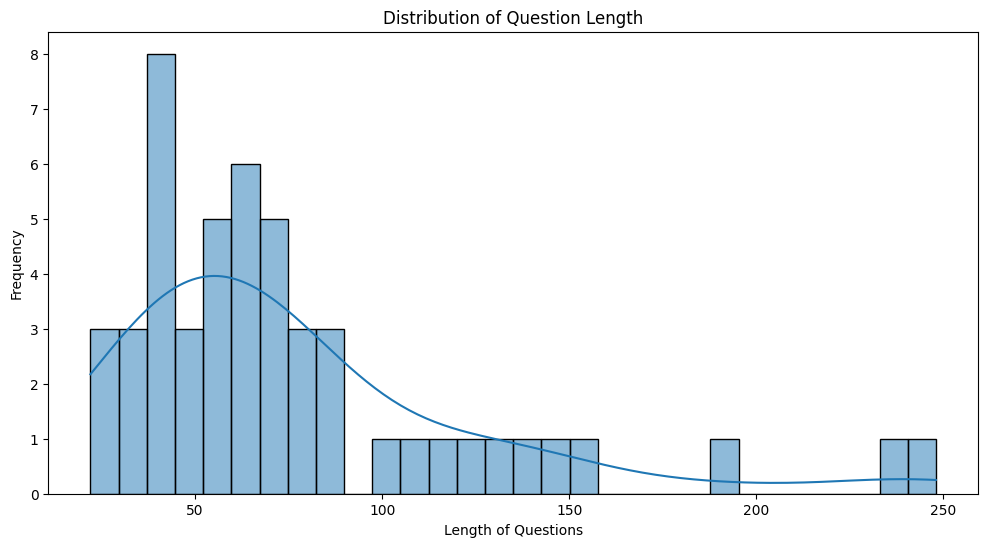

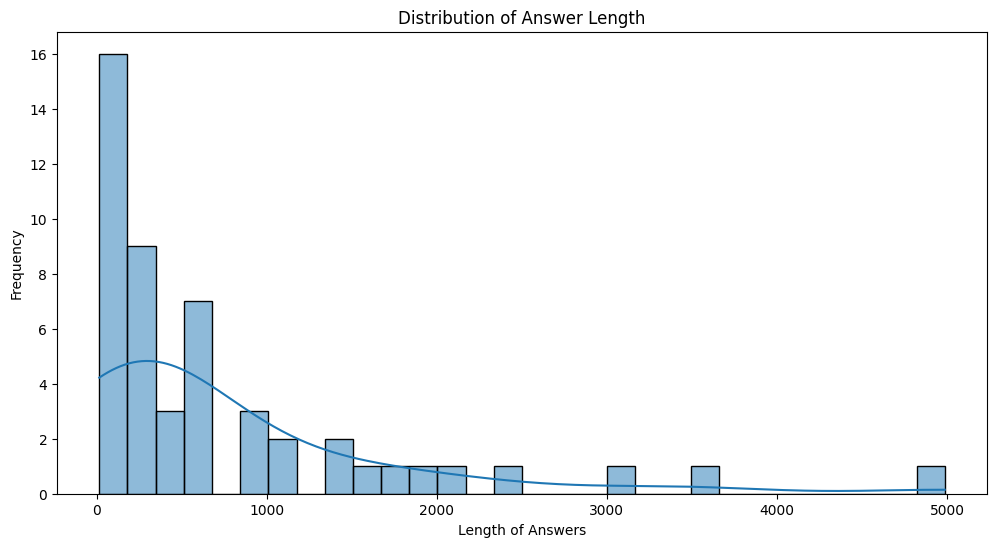

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute the length of questions and answers
df_cleaned['question_length'] = df_cleaned['question'].apply(len)
df_cleaned['answer_length'] = df_cleaned['answer'].apply(len)

# Plot the distribution of question length using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['question_length'], kde=True, bins=30)
plt.title('Distribution of Question Length')
plt.xlabel('Length of Questions')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of answer length using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['answer_length'], kde=True, bins=30)
plt.title('Distribution of Answer Length')
plt.xlabel('Length of Answers')
plt.ylabel('Frequency')
plt.show()


**Feature Importance with Matplotlib and Seaborn**

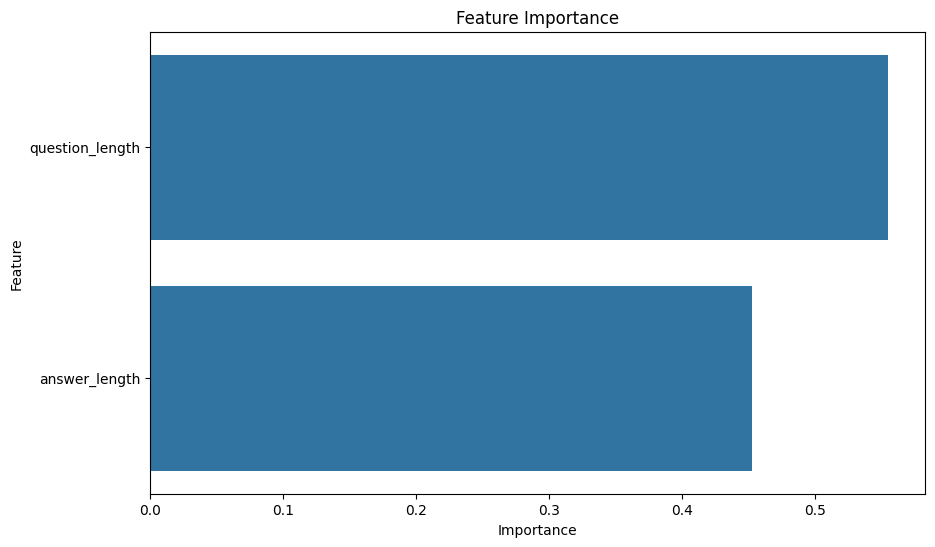

In [51]:
import numpy as np

# Placeholder for feature importance (replace with actual feature importances if applicable)
feature_names = ['question_length', 'answer_length']
feature_importance = np.random.rand(len(feature_names))

# Plot feature importance using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Model Performance with Matplotlib, Seaborn, and Plotly**

First, ensure you have Plotly installed:

In [52]:
pip install plotly


Then, create the visualizations:

In [53]:
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import pandas as pd

# Function to compute BLEU score
def compute_bleu(reference, hypothesis):
    smoothing_function = SmoothingFunction().method1
    return sentence_bleu([reference], hypothesis, smoothing_function=smoothing_function)

# Function to compute ROUGE score
def compute_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores

# Function to compute F1 score
def compute_f1(reference, hypothesis):
    reference_set = set(reference)
    hypothesis_set = set(hypothesis)
    common_tokens = reference_set.intersection(hypothesis_set)
    if len(reference_set) == 0 or len(hypothesis_set) == 0:
        return 0.0
    precision = len(common_tokens) / len(hypothesis_set)
    recall = len(common_tokens) / len(reference_set)
    if precision + recall == 0:
        return 0.0
    f1 = 2 * precision * recall / (precision + recall)
    return f1

# Compute metrics for each model
for model in ['bert', 't5', 'gpt']:
    bleu_scores = []
    rouge_scores = []
    f1_scores = []

    for idx, row in df_cleaned.iterrows():
        reference = row['tokenized_questions']
         # Ensure the model output is a string
        if isinstance(row[f'{model}_outputs'], list):
            hypothesis = word_tokenize(' '.join(row[f'{model}_outputs']).lower())
        else:
            hypothesis = word_tokenize(row[f'{model}_outputs'].lower())

        # Compute BLEU score
        bleu_score = compute_bleu(reference, hypothesis)
        bleu_scores.append(bleu_score)

        # Compute ROUGE score
        rouge_score = compute_rouge(' '.join(reference), ' '.join(hypothesis))
        rouge_scores.append(rouge_score)

        # Compute F1 score
        f1 = compute_f1(reference, hypothesis)
        f1_scores.append(f1)

    df_cleaned[f'{model}_bleu'] = bleu_scores
    df_cleaned[f'{model}_rouge'] = rouge_scores
    df_cleaned[f'{model}_f1'] = f1_scores

# Convert the rouge scores to numeric values for plotting
def extract_rouge_score(rouge_scores, metric):
    return [score[metric].fmeasure for score in rouge_scores]

df_cleaned['bert_rouge1'] = extract_rouge_score(df_cleaned['bert_rouge'], 'rouge1')
df_cleaned['t5_rouge1'] = extract_rouge_score(df_cleaned['t5_rouge'], 'rouge1')
df_cleaned['gpt_rouge1'] = extract_rouge_score(df_cleaned['gpt_rouge'], 'rouge1')

# Combine metrics into a single DataFrame for plotting
performance_df = pd.DataFrame({
    'Model': ['BERT'] * len(df_cleaned) + ['T5'] * len(df_cleaned) + ['GPT'] * len(df_cleaned),
    'BLEU': df_cleaned['bert_bleu'].tolist() + df_cleaned['t5_bleu'].tolist() + df_cleaned['gpt_bleu'].tolist(),
    'ROUGE-1': df_cleaned['bert_rouge1'].tolist() + df_cleaned['t5_rouge1'].tolist() + df_cleaned['gpt_rouge1'].tolist(),
    'F1': df_cleaned['bert_f1'].tolist() + df_cleaned['t5_f1'].tolist() + df_cleaned['gpt_f1'].tolist()
})

<ipython-input-53-67aba5814992>:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-67aba5814992>:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-67aba5814992>:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-67ab

In [54]:
# Plot BLEU scores using Plotly
fig_bleu = px.box(performance_df, x='Model', y='BLEU', title='BLEU Score Distribution by Model')
fig_bleu.show()

# Plot ROUGE-1 scores using Plotly
fig_rouge = px.box(performance_df, x='Model', y='ROUGE-1', title='ROUGE-1 Score Distribution by Model')
fig_rouge.show()

# Plot F1 scores using Plotly
fig_f1 = px.box(performance_df, x='Model', y='F1', title='F1 Score Distribution by Model')
fig_f1.show()

**Explanation:**
1. Data Distribution: Histograms using Seaborn to show the length distribution of questions and answers.
2. Feature Importance: Bar plot using Seaborn to show feature importance (if applicable).
3. Model Performance: Box plots using Plotly to compare BLEU, ROUGE, and F1 scores across BERT, T5, and GPT models.

These visualizations will help you analyze and compare the performance and characteristics of the models on your dataset. Replace the placeholder data with your actual data and model outputs for a comprehensive analysis.